[*********************100%***********************]  12 of 12 completed
----------------------------------------------------------------------
Stocks: BPAC11.SA, CCRO3.SA, CPLE6.SA, CYRE3.SA, IGTA3.SA, ITUB4.SA, LCAM3.SA, LREN3.SA, PRIO3.SA, CSNA3.SA, VALE3.SA, VVAR3.SA
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.241
Portfolio Volatility: 0.240
Portfolio Sharpe Ratio: 0.983

Skewness:
   BPAC11.SA  CCRO3.SA  CPLE6.SA  CYRE3.SA  IGTA3.SA  ITUB4.SA  LCAM3.SA  \
0   0.291319 -0.134106 -0.686065  0.573758  0.350039  0.669673 -0.151941   

   LREN3.SA  PRIO3.SA  CSNA3.SA  VALE3.SA  VVAR3.SA  
0    0.1861 -0.818111  0.184194 -0.098489   0.35913  

Kurtosis:
   BPAC11.SA  CCRO3.SA  CPLE6.SA  CYRE3.SA  IGTA3.SA  ITUB4.SA  LCAM3.SA  \
0  -1.346235 -0.659087  0.096036 -0.358607 -1.101002 -0.554822  -0.60222   

   LREN3.SA  PRIO3.SA  CSNA3.SA  VALE3.SA  VVAR3.SA  
0 -0.442278 -0.542154 -1.396452 -1.434228 -1.387894  

Information:
    Allocation       Name
0     

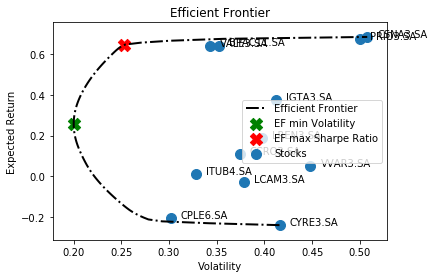

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 252 days
Expected return: 0.273
Volatility: 0.216
Sharpe Ratio: 1.242

Optimal weights:
            BPAC11.SA  CCRO3.SA  CPLE6.SA  CYRE3.SA  IGTA3.SA  ITUB4.SA  \
Allocation   0.214875  0.072024  0.147856  0.001468  0.006549  0.191561   

            LCAM3.SA  LREN3.SA  PRIO3.SA  CSNA3.SA  VALE3.SA  VVAR3.SA  
Allocation  0.027193  0.036161  0.099494  0.008232  0.110942  0.083646  
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 252 days
Expected return: 0.438
Volatility: 0.239
Sharpe Ratio: 1.814

Optimal weights:
            BPAC11.SA  CCRO3.SA  CPLE6.SA  CYRE3.SA  IGTA3.SA  ITUB4.SA  \
Allocation   0.134214  0.078029  0.024501  0.009285  0.086378  0.016834   

            LCAM3.SA  LREN3.SA  PRIO3.SA  CSNA3.SA  VALE3.SA  VVAR3.SA  
Allocation   0.02239  0.165606  0.113812  0.1

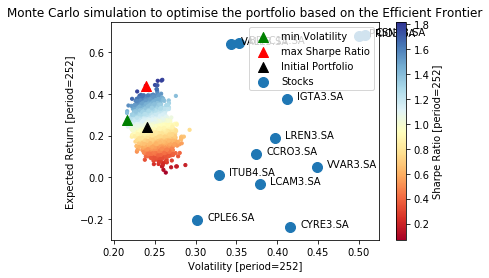

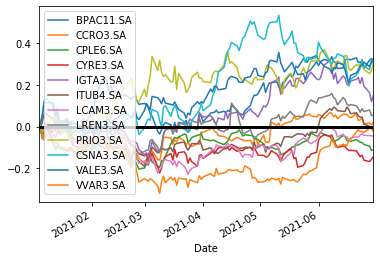

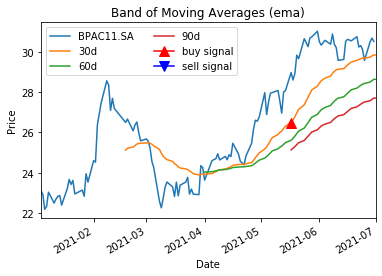

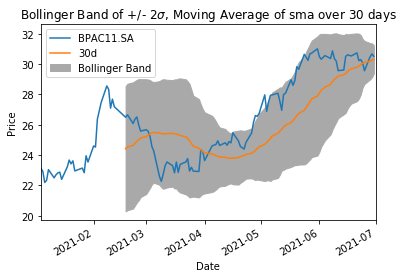

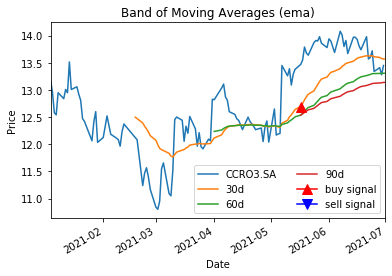

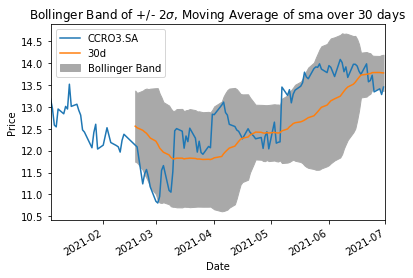

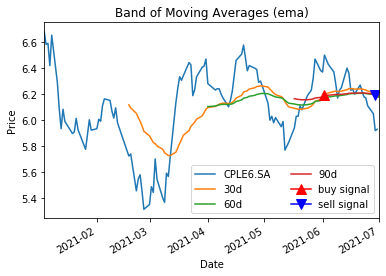

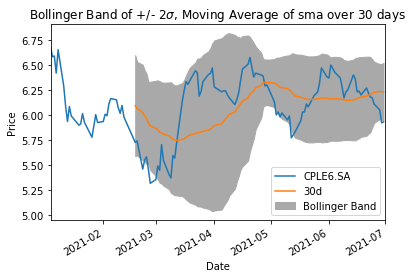

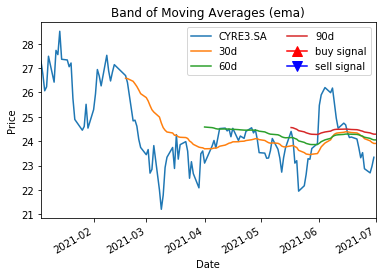

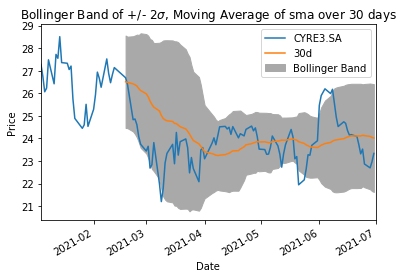

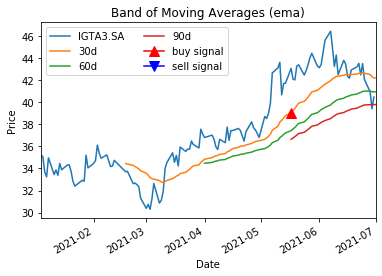

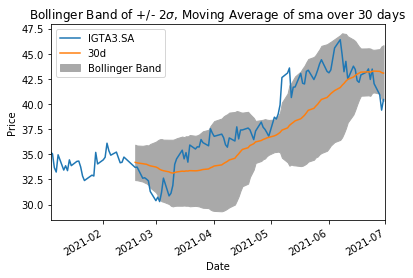

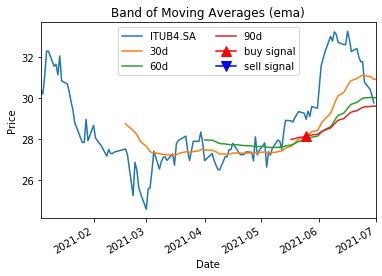

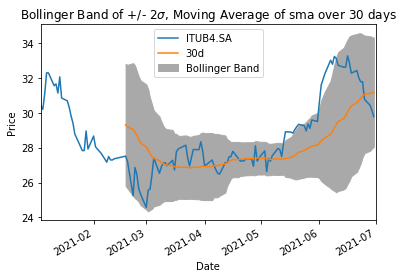

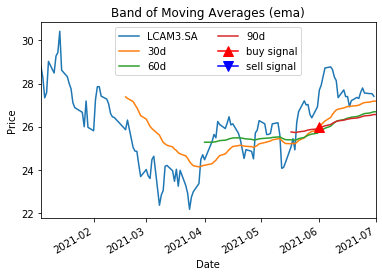

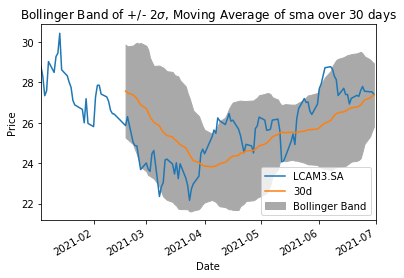

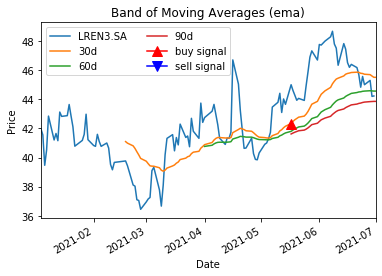

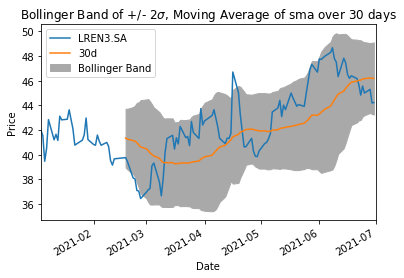

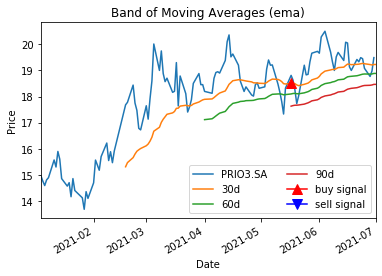

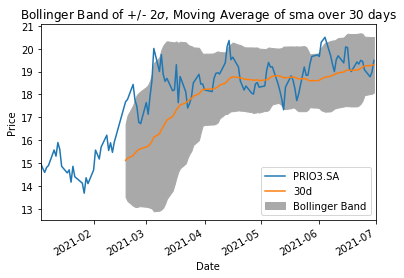

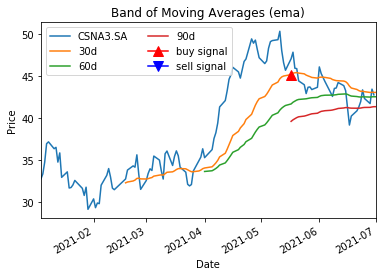

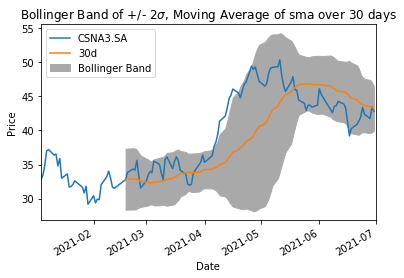

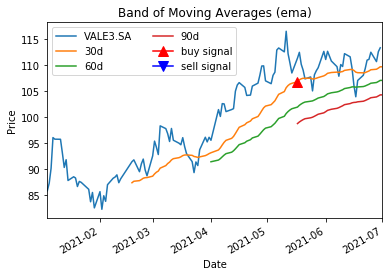

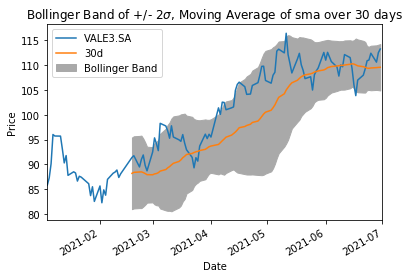

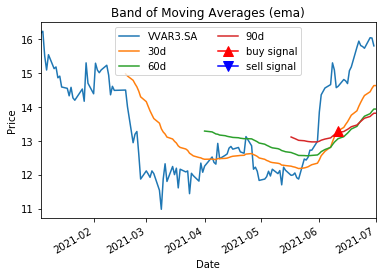

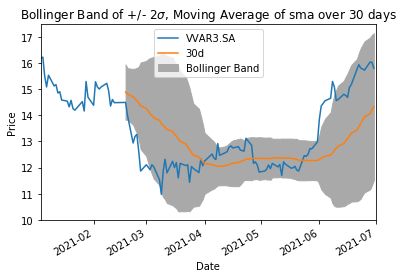

In [6]:
from finquant.portfolio import build_portfolio
from finquant.moving_average import compute_ma
from finquant.moving_average import sma
from finquant.moving_average import plot_bollinger_band
from finquant.moving_average import ema
import matplotlib.pyplot as plt
names = ['BPAC11.SA', 'CCRO3.SA', 'CPLE6.SA', 'CYRE3.SA', 'IGTA3.SA', 'ITUB4.SA', 'LCAM3.SA', 'LREN3.SA', 'PRIO3.SA', 'CSNA3.SA', 'VALE3.SA', 'VVAR3.SA']
start_date = '2021-01-01'
end_date = '2021-07-01'
pf = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date,
                    data_api="yfinance")
pf.properties()
print("pf.risk_free_rate = {}".format(pf.risk_free_rate))
print("pf.freq = {}".format(pf.freq))
pf.ef_minimum_volatility(verbose=True)
pf.ef_maximum_sharpe_ratio(verbose=True)

pf.ef_plot_efrontier()
pf.ef_plot_optimal_portfolios()
pf.plot_stocks()
plt.show()

opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_properties()
pf.mc_plot_results()
# again, the individual stocks can be added to the plot
pf.plot_stocks()
plt.show()

pf.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)

for name in names:
    dis = pf.get_stock(name).data.copy(deep=True)
    spans = [30,60, 90]
    span = 30
    dis_ma = compute_ma(dis, ema, spans)
    plot_bollinger_band(dis, sma, span)